# Battery Pub PyBaMM Taster

## 01 Running a simulation in 6 easy steps

Import the PyBaMM package

In [ ]:
%pip install pybamm -q    # install PyBaMM if it is not installed
import pybamm

ERROR: Invalid requirement: '#'


Note: you may need to restart the kernel to use updated packages.


Load the model that we wish to run. For this notebook, we choose the Doyle-Fuller-Newman (DFN) model:

In [2]:
model = pybamm.lithium_ion.DFN()

Load the Parameter Values that we wish to run. For this notebook, we choose the Chen2020 parameter set [Chen et al (2020)](https://iopscience.iop.org/article/10.1149/1945-7111/ab9050):

In [3]:
parameter_values = pybamm.ParameterValues("Chen2020")

We now use this model to create a PyBaMM Simulation, which is used to process and solve the model:

In [4]:
sim = pybamm.Simulation(model, parameter_values=parameter_values)

We can then call 'solve' on our simulation object to solve the model, passing the window of time to solve for in seconds (here 1 hour):

In [5]:
sol = sim.solve([0, 3600])

Finally, we can call 'plot' to generate a dynamic plot of the key variables:

In [6]:
sim.plot()

interactive(children=(FloatSlider(value=0.0, description='t', max=3555.4480183302453, step=35.55448018330245),…

## 02 Inspecting and customising a parameter set

In [7]:
parameter_values

{'Ambient temperature [K]': 298.15,
 'Boltzmann constant [J.K-1]': 1.380649e-23,
 'Bulk solvent concentration [mol.m-3]': 2636.0,
 'Cation transference number': 0.2594,
 'Cell cooling surface area [m2]': 0.00531,
 'Cell thermal expansion coefficient [m.K-1]': 1.1e-06,
 'Cell volume [m3]': 2.42e-05,
 'Contact resistance [Ohm]': 0,
 'Current function [A]': 5.0,
 'EC diffusivity [m2.s-1]': 2e-18,
 'EC initial concentration in electrolyte [mol.m-3]': 4541.0,
 'Electrode height [m]': 0.065,
 'Electrode width [m]': 1.58,
 'Electrolyte conductivity [S.m-1]': <function electrolyte_conductivity_Nyman2008 at 0x000002441810DD80>,
 'Electrolyte diffusivity [m2.s-1]': <function electrolyte_diffusivity_Nyman2008 at 0x000002441810DEA0>,
 'Electron charge [C]': 1.602176634e-19,
 'Faraday constant [C.mol-1]': 96485.33212,
 'Ideal gas constant [J.K-1.mol-1]': 8.314462618,
 'Initial concentration in electrolyte [mol.m-3]': 1000.0,
 'Initial concentration in negative electrode [mol.m-3]': 29866.0,
 'Initi

We can observe this returns a dictionary with the parameters, so we can access a given value simply by typing the right key.

In [8]:
parameter_values["Negative electrode porosity"]

0.25

However, if we check the type of the object, we will notice that this is not a standard dictionary but a `ParameterValues` object.

In [9]:
type(parameter_values)

pybamm.parameters.parameter_values.ParameterValues

This means it has some additional functionality. For example, we can search in the dictionary the entries with a specific keyword(s).

In [10]:
parameter_values.search("porosity")

Negative electrode porosity	0.25
Positive electrode porosity	0.335
Separator porosity	0.47


Often we want to change the parameter sets, or even define a completely new one. To modify an existing parameter set, we can simply modify it by assigning a new value to a given parameter.

In [7]:
parameter_values["Negative electrode porosity"] = 0.3

If you want to update several parameters at once, it is convenient to use the `update` command.

In [13]:
parameter_values.update({
    "Negative electrode porosity": 0.2,
})

For safety, if you try to add a parameter that doesn't already exist in the dictionary, you will get an error. To avoid that, you can pass the option `check_already_exists=False` when updating a parameter set.

## 03 Use Quickplot to compare simulations

In [15]:
sim2 = pybamm.Simulation(model, parameter_values=parameter_values)
sim2.solve([0, 3600])

In [20]:
plot = pybamm.QuickPlot(solutions=[sim.solution, sim2.solution], labels=["Normal porosity", "Lower porosity"])

In [21]:
plot.dynamic_plot()

interactive(children=(FloatSlider(value=0.0, description='t', max=3555.4480183302453, step=35.55448018330245),…

## 04 Changing model options

In PyBaMM options can be passed to models to easily change what physics is included and how it is modelled. A full list of options can be found in the [documentation](https://pybamm.readthedocs.io/en/latest/source/models/base_models/base_battery_model.html?highlight=options#pybamm.BatteryModelOptions.options).

In [22]:
pybamm.BatteryModelOptions({}).possible_options

{'calculate discharge energy': ['false', 'true'],
 'calculate heat source for isothermal models': ['false', 'true'],
 'cell geometry': ['arbitrary', 'pouch'],
 'contact resistance': ['false', 'true'],
 'convection': ['none', 'uniform transverse', 'full transverse'],
 'current collector': ['uniform',
  'potential pair',
  'potential pair quite conductive'],
 'dimensionality': [0, 1, 2],
 'electrolyte conductivity': ['default',
  'full',
  'leading order',
  'composite',
  'integrated'],
 'hydrolysis': ['false', 'true'],
 'intercalation kinetics': ['symmetric Butler-Volmer',
  'asymmetric Butler-Volmer',
  'linear',
  'Marcus',
  'Marcus-Hush-Chidsey'],
 'interface utilisation': ['full', 'constant', 'current-driven'],
 'lithium plating': ['none',
  'reversible',
  'partially reversible',
  'irreversible'],
 'lithium plating porosity change': ['false', 'true'],
 'loss of active material': ['none',
  'stress-driven',
  'reaction-driven',
  'stress and reaction-driven'],
 'open-circuit pote

In [23]:
# list options to compare
particle_options = [
    'Fickian diffusion',
    'uniform profile',
    'quadratic profile',
    'quartic profile',
]

# loop over options and solve
sols = []
for option in particle_options:
    model = pybamm.lithium_ion.SPMe(options={"particle": option})
    params = pybamm.ParameterValues("Ecker2015")  # includes nonlinear diffusivity 
    sim = pybamm.Simulation(model, parameter_values=params)
    sol = sim.solve([0, 4000])
    print("Solve time:", sol.solve_time)
    sols.append(sol) 

Solve time: 1.038 s
Solve time: 15.066 ms
Solve time: 15.081 ms
Solve time: 20.737 ms


Let's see how they compare on the surface

In [24]:
# plot comparison
pybamm.dynamic_plot(sols, labels=particle_options)

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0517494588988765, step=0.01051749458898876…

In [25]:
# plot comparison
pybamm.dynamic_plot(
    sols, 
    ["X-averaged negative particle concentration", "X-averaged positive particle concentration"], 
    labels=particle_options,
)

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0517494588988765, step=0.01051749458898876…

## 05 Running Experiments

### Old syntax

The simplest way to set up an experiment is to define the operating conditions using a simple string. We can use plan English commands to describe steps of prescribed current, voltage or power and include termination conditions. Round brackets within the list of instructions are used to denote cycles

In [26]:
experiment = pybamm.Experiment([
    ("Discharge at 1C until 3V",
     "Rest for 1 hour",
     "Charge at 1C until 4.2V", 
     "Hold at 4.2V until C/50"
    )
])

We then simply pass the experiment to the simulation class

In [27]:
model = pybamm.lithium_ion.SPMe()
sim = pybamm.Simulation(model, experiment=experiment)

and solve

In [28]:
sol = sim.solve()

In [29]:
sim.plot()

interactive(children=(FloatSlider(value=0.0, description='t', max=3.5910005673132734, step=0.03591000567313273…

We can look at the parts of the solution that correspond to the cycles

In [30]:
sol.cycles

Here we have a single cycle. We can also look at the individual steps that make up the cycle

In [31]:
sol.cycles[0].steps

and plot them individually

In [32]:
sol.cycles[0].steps[2].plot()

interactive(children=(FloatSlider(value=2.01166644621969, description='t', max=3.2537258400021987, min=2.01166…

### New syntax

In [35]:
import numpy as np

t = np.linspace(0, 600, 601)
sin_t = 10 * np.sin(2 * np.pi * t / 100)
drive_cycle_power = np.column_stack([t,sin_t])
power_step = [pybamm.step.power(drive_cycle_power)]

current_step = [pybamm.step.current(-1, termination="4.2V", period="5s")]
voltage_step = [pybamm.step.voltage(4.2, termination="C/50")]
experiment = pybamm.Experiment(power_step + current_step + voltage_step)

In [34]:
sim = pybamm.Simulation(model, experiment=experiment)
sol = sim.solve()
sim.plot()

interactive(children=(FloatSlider(value=0.0, description='t', max=2458.436270774266, step=24.584362707742663),…

## 06 Simulating Degradation

In [37]:
parameter_values = pybamm.ParameterValues("Mohtat2020")
parameter_values.update({"SEI kinetic rate constant [m.s-1]": 1e-14})
spm = pybamm.lithium_ion.SPM({"SEI": "ec reaction limited"})

We can now simulate a single CCCV cycle using the `Experiment` class (see [this notebook](https://github.com/pybamm-team/PyBaMM/blob/develop/examples/notebooks/Getting%20Started/Tutorial%205%20-%20Run%20experiments.ipynb) for more details)

In [39]:
experiment = pybamm.Experiment([
    ("Discharge at 1C until 3V",
     "Rest for 1 hour",
     "Charge at 1C until 4.2V", 
     "Hold at 4.2V until C/50")
] * 500,
termination="80% capacity"
)
sim = pybamm.Simulation(spm, experiment=experiment, parameter_values=parameter_values)
sol = sim.solve(initial_soc=1)

2023-09-04 13:57:06.091 - [NOTICE] callbacks.on_cycle_start(172): Cycle 1/500 (100.400 us elapsed) --------------------
2023-09-04 13:57:06.092 - [NOTICE] callbacks.on_step_start(180): Cycle 1/500, step 1/4: Discharge at 1C until 3V
2023-09-04 13:57:06.141 - [NOTICE] callbacks.on_step_start(180): Cycle 1/500, step 2/4: Rest for 1 hour
2023-09-04 13:57:06.172 - [NOTICE] callbacks.on_step_start(180): Cycle 1/500, step 3/4: Charge at 1C until 4.2V
2023-09-04 13:57:06.222 - [NOTICE] callbacks.on_step_start(180): Cycle 1/500, step 4/4: Hold at 4.2V until C/50
2023-09-04 13:57:06.990 - [NOTICE] callbacks.on_cycle_end(194): Capacity is now 4.941 Ah (originally 4.941 Ah, will stop at 3.952 Ah)
2023-09-04 13:57:06.991 - [NOTICE] callbacks.on_cycle_start(172): Cycle 2/500 (899.458 ms elapsed) --------------------
2023-09-04 13:57:06.991 - [NOTICE] callbacks.on_step_start(180): Cycle 2/500, step 1/4: Discharge at 1C until 3V
2023-09-04 13:57:07.015 - [NOTICE] callbacks.on_step_start(180): Cycle 2

### Summary variables

We can plot standard variables like the current and voltage, but it isn't very instructive on these timescales

In [40]:
sol.plot(["Current [A]", "Terminal voltage [V]"])

interactive(children=(FloatSlider(value=0.0, description='t', max=147.0814576721651, step=1.470814576721651), …

Instead, we plot "summary variables", which show how the battery degrades over time by various metrics. Some of the variables also have "Change in ...", which is how much that variable changes over each cycle. This can be achieved by using `plot_summary_variables` method of pybamm, which can also be used to compare "summary variables" extracted from 2 or more solutions.

In [41]:
sorted(sol.summary_variables.keys())

['Capacity [A.h]',
 'Capacity [mA.h.cm-2]',
 'Change in local ECM resistance [Ohm]',
 'Change in loss of active material in negative electrode [%]',
 'Change in loss of active material in positive electrode [%]',
 'Change in loss of capacity to SEI [A.h]',
 'Change in loss of capacity to SEI on cracks [A.h]',
 'Change in loss of capacity to lithium plating [A.h]',
 'Change in loss of lithium inventory [%]',
 'Change in loss of lithium inventory, including electrolyte [%]',
 'Change in loss of lithium to SEI [mol]',
 'Change in loss of lithium to SEI on cracks [mol]',
 'Change in loss of lithium to lithium plating [mol]',
 'Change in negative electrode capacity [A.h]',
 'Change in positive electrode capacity [A.h]',
 'Change in throughput capacity [A.h]',
 'Change in throughput energy [W.h]',
 'Change in time [h]',
 'Change in time [s]',
 'Change in total capacity lost to side reactions [A.h]',
 'Change in total lithium [mol]',
 'Change in total lithium in electrolyte [mol]',
 'Change i

The "summary variables" associated with a particular model can also be accessed as a list (which can then be edited) -

In [42]:
spm.summary_variables

['Time [s]',
 'Time [h]',
 'Throughput capacity [A.h]',
 'Throughput energy [W.h]',
 'Loss of lithium inventory [%]',
 'Loss of lithium inventory, including electrolyte [%]',
 'Total lithium [mol]',
 'Total lithium in electrolyte [mol]',
 'Total lithium in particles [mol]',
 'Total lithium lost [mol]',
 'Total lithium lost from particles [mol]',
 'Total lithium lost from electrolyte [mol]',
 'Loss of lithium to SEI [mol]',
 'Loss of capacity to SEI [A.h]',
 'Total lithium lost to side reactions [mol]',
 'Total capacity lost to side reactions [A.h]',
 'Local ECM resistance [Ohm]',
 'Negative electrode capacity [A.h]',
 'Loss of active material in negative electrode [%]',
 'Total lithium in negative electrode [mol]',
 'Loss of lithium to lithium plating [mol]',
 'Loss of capacity to lithium plating [A.h]',
 'Loss of lithium to SEI on cracks [mol]',
 'Loss of capacity to SEI on cracks [A.h]',
 'Positive electrode capacity [A.h]',
 'Loss of active material in positive electrode [%]',
 'Tot

Here the only degradation mechanism is one that causes loss of lithium, so we don't see loss of active material

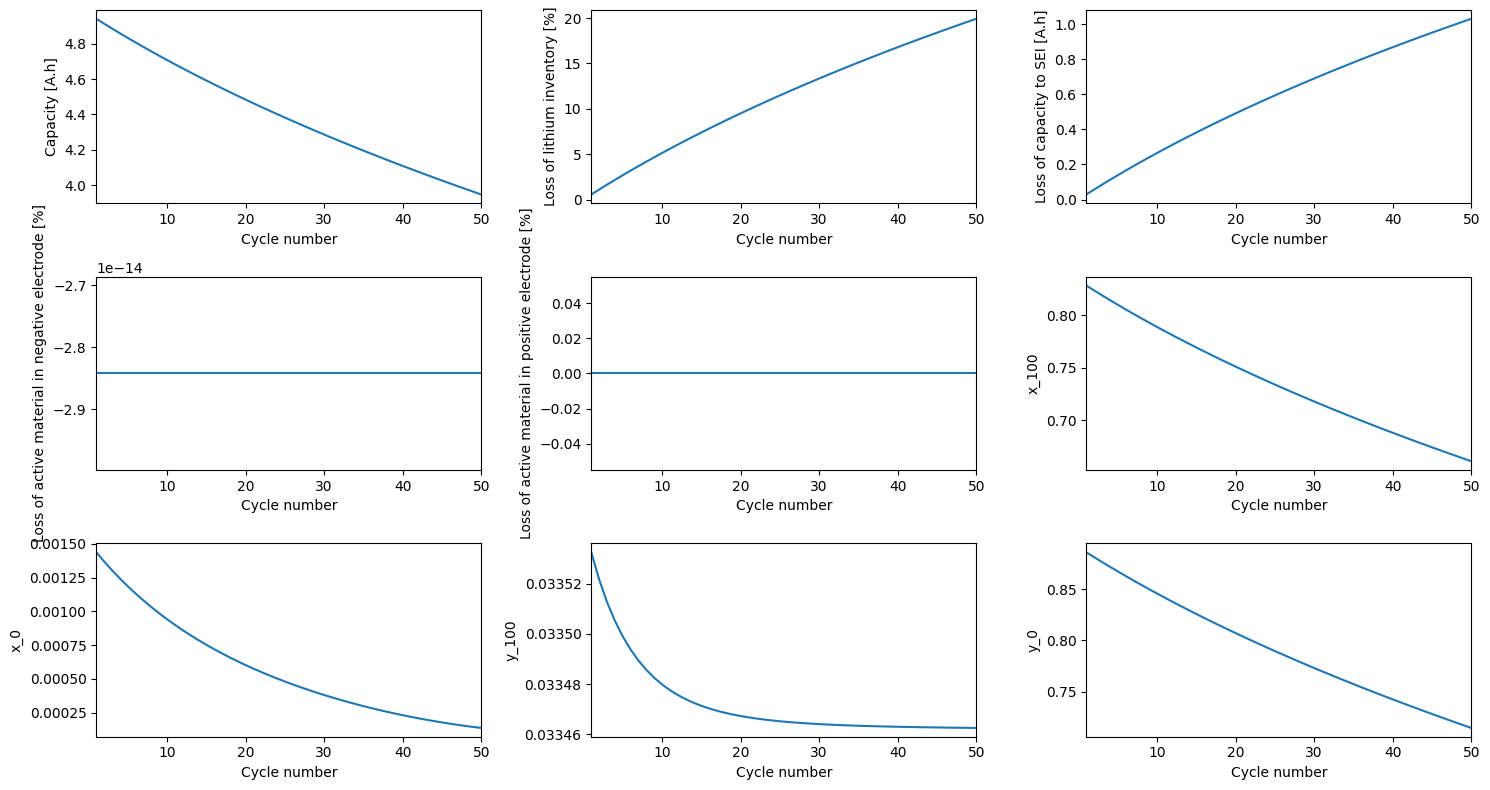

array([[<Axes: xlabel='Cycle number', ylabel='Capacity [A.h]'>,
        <Axes: xlabel='Cycle number', ylabel='Loss of lithium inventory [%]'>,
        <Axes: xlabel='Cycle number', ylabel='Loss of capacity to SEI [A.h]'>],
       [<Axes: xlabel='Cycle number', ylabel='Loss of active material in negative electrode [%]'>,
        <Axes: xlabel='Cycle number', ylabel='Loss of active material in positive electrode [%]'>,
        <Axes: xlabel='Cycle number', ylabel='x_100'>],
       [<Axes: xlabel='Cycle number', ylabel='x_0'>,
        <Axes: xlabel='Cycle number', ylabel='y_100'>,
        <Axes: xlabel='Cycle number', ylabel='y_0'>]], dtype=object)

In [43]:
pybamm.plot_summary_variables(sol)